# **Step 1**: Import libraries and set plot style

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# **Step 2**: Get and prepare the data

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [4]:
df.shape

(150, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [6]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

# **Step 3**: Visualize the data

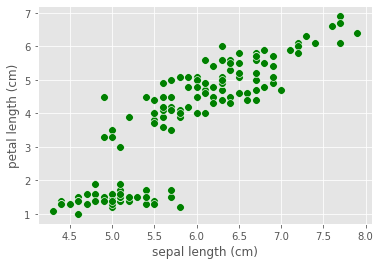

In [7]:
sns.scatterplot(x='sepal length (cm)', y='petal length (cm)', 
                data=df, s=60, color='green')
plt.savefig('scatterplot.png', dpi=100)

# **Step 4**: Build the model

## 4.a: Obtain the feature matrix

In [8]:
X = df[['sepal length (cm)', 'petal length (cm)']].values

## 4.b: Choose the right estimator

In [9]:
from sklearn.cluster import KMeans

## 4.c: Create and train (fit) the model

In [10]:
model = KMeans(n_clusters=3, random_state=42)

In [11]:
model.fit(X)

KMeans(n_clusters=3, random_state=42)

In [12]:
centroids = model.cluster_centers_
centroids

array([[6.83902439, 5.67804878],
       [5.00784314, 1.49215686],
       [5.87413793, 4.39310345]])

## 4.e: Assign each data point to cluster index (label)

In [13]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

## 4.f: Visulaize the clusters and centroids

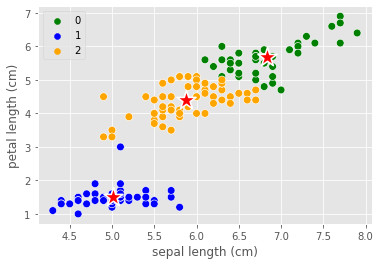

In [14]:
sns.scatterplot(x='sepal length (cm)', y='petal length (cm)', data=df,
                s=60, hue=model.labels_, palette=['green', 'blue', 'orange'])

sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], marker='*', 
                s=400, color='red')

plt.savefig('clustering.png', dpi=100)

# **The Elbow Method**

In [15]:
model.inertia_

53.80997864410693

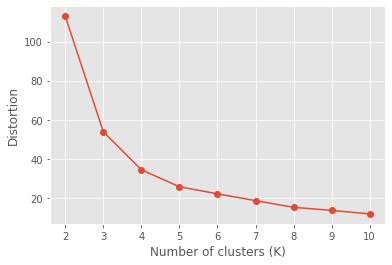

In [16]:
distortions = []

for k in range(2, 11):
    KMeans_model = KMeans(n_clusters=k, random_state=42)
    KMeans_model.fit(X)
    distortions.append(KMeans_model.inertia_)

plt.plot(range(2, 11), distortions,  marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Distortion')
plt.savefig('elbow plot.png')

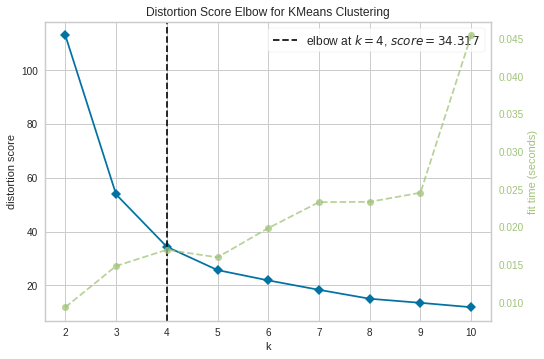

In [17]:
from yellowbrick.cluster import KElbowVisualizer

visualizer3 = KElbowVisualizer(KMeans(), k=(2,11))

visualizer3.fit(X) # Fit the data to the visualizer
visualizer3.show(outpath='elbowplot2.png')  

# **The Silhouette Score**

In [18]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 11):
    model2 = KMeans(n_clusters=k, random_state=42)
    model2.fit(X)
    score = silhouette_score(X, model2.labels_)
    print("Silhouette Score for k = ", k, "is", score)
    silhouette_scores.append(score)

Silhouette Score for k =  2 is 0.7097529826994816
Silhouette Score for k =  3 is 0.5890584158017611
Silhouette Score for k =  4 is 0.5645593160995663
Silhouette Score for k =  5 is 0.5577931215347036
Silhouette Score for k =  6 is 0.41177757163941237
Silhouette Score for k =  7 is 0.40668478139262904
Silhouette Score for k =  8 is 0.41383464955438437
Silhouette Score for k =  9 is 0.39620674415596785
Silhouette Score for k =  10 is 0.4292093502645689


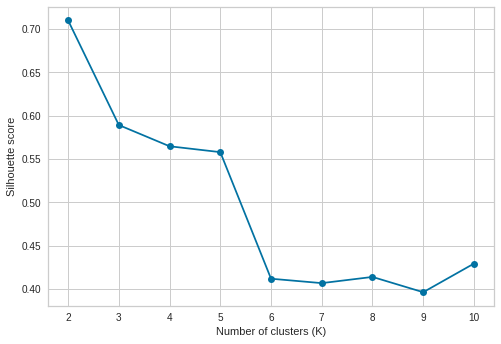

In [19]:
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette score')
plt.savefig('silhouette plot.png')

# **The Silhouette Diagram**

**When k = 2**

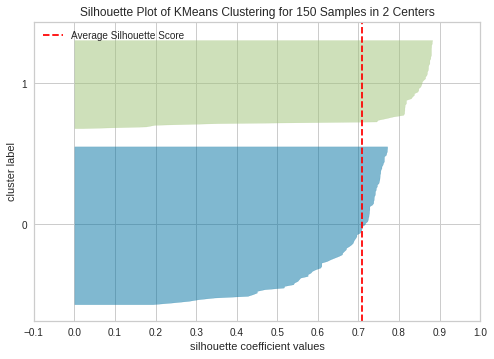

In [28]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer


module_k_2 = KMeans(n_clusters=2,random_state=42)
visualizer_k_2 = SilhouetteVisualizer(module_k_2, colors='yellowbrick')
visualizer_k_2.fit(X)
visualizer_k_2.show(outpath='silhouette_diagram_k_2.png')

**When k = 3**

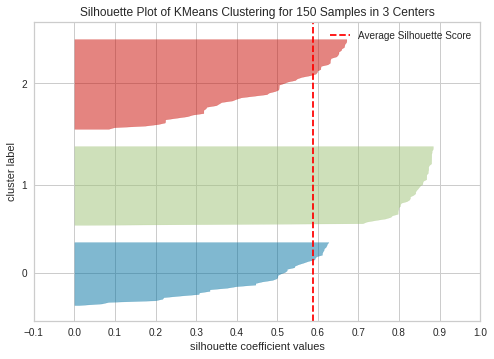

In [22]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

module_k_3 = KMeans(n_clusters=3,random_state=42)
visualizer_k_3 = SilhouetteVisualizer(module_k_3, colors='yellowbrick')
visualizer_k_3.fit(X)
visualizer_k_3.show(outpath='silhouette_diagram_k_3.png')

**When k = 4**

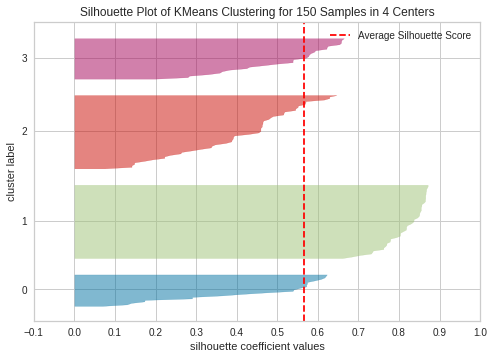

In [23]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

module_k_4 = KMeans(n_clusters=4,random_state=42)
visualizer_k_4 = SilhouetteVisualizer(module_k_4, colors='yellowbrick')
visualizer_k_4.fit(X)
visualizer_k_4.show(outpath='silhouette_diagram_k_4.png')

**When k = 5**

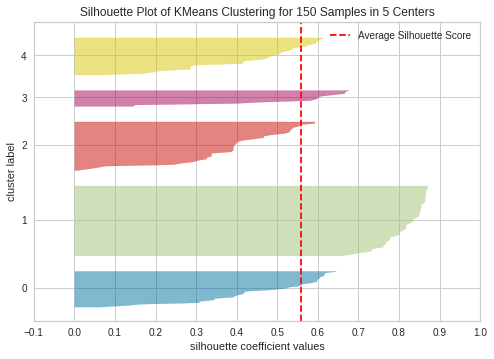

In [24]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

module_k_5 = KMeans(n_clusters=5,random_state=42)
visualizer_k_5 = SilhouetteVisualizer(module_k_5, colors='yellowbrick')
visualizer_k_5.fit(X)
visualizer_k_5.show(outpath='silhouette_diagram_k_5.png')

**When k = 6**

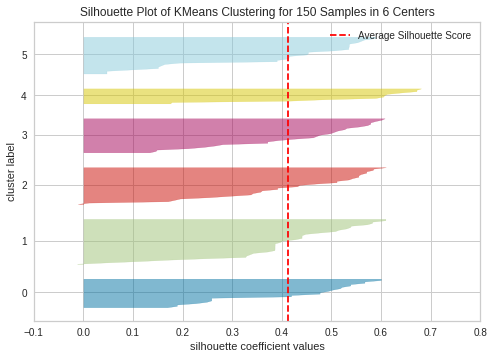

In [25]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

module_k_6 = KMeans(n_clusters=6,random_state=42)
visualizer_k_6 = SilhouetteVisualizer(module_k_6, colors='yellowbrick')
visualizer_k_6.fit(X)
visualizer_k_6.show(outpath='silhouette_diagram_k_6.png')

**When k = 7**

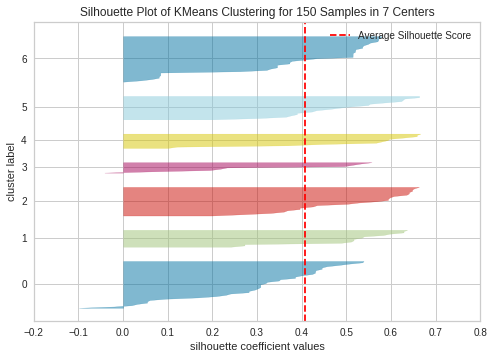

In [26]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

module_k_7 = KMeans(n_clusters=7,random_state=42)
visualizer_k_7 = SilhouetteVisualizer(module_k_7, colors='yellowbrick')
visualizer_k_7.fit(X)
visualizer_k_7.show(outpath='silhouette_diagram_k_7.png')

**When k = 8**

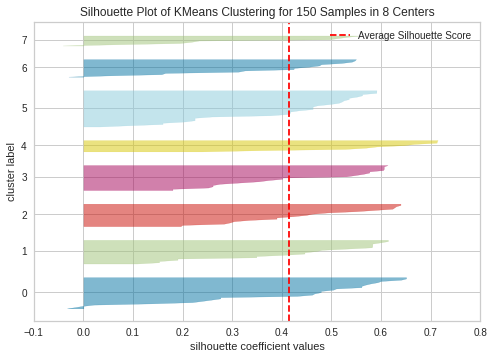

In [27]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

module_k_8 = KMeans(n_clusters=8,random_state=42)
visualizer_k_8 = SilhouetteVisualizer(module_k_8, colors='yellowbrick')
visualizer_k_8.fit(X)
visualizer_k_8.show(outpath='silhouette_diagram_k_8.png')

# **Clusters Predicted**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


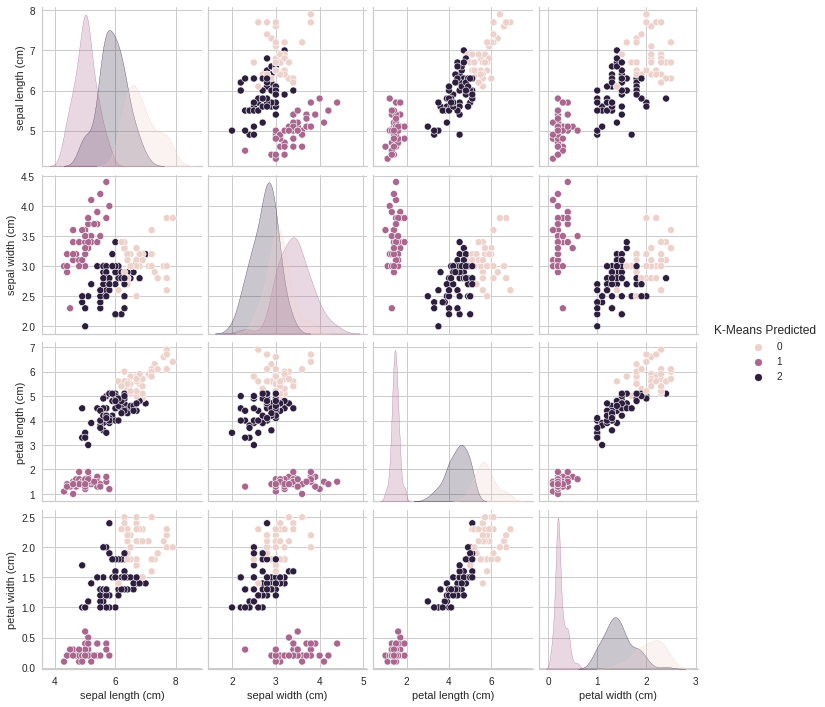

In [38]:
x = df.iloc[:,:4]
kmeans = KMeans(n_clusters = 3, max_iter = 1000, n_init = 10, init = 'k-means++', random_state=123).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters
sns.pairplot(x, hue="K-Means Predicted", diag_kind= 'kde')

# **Clusters Actual**

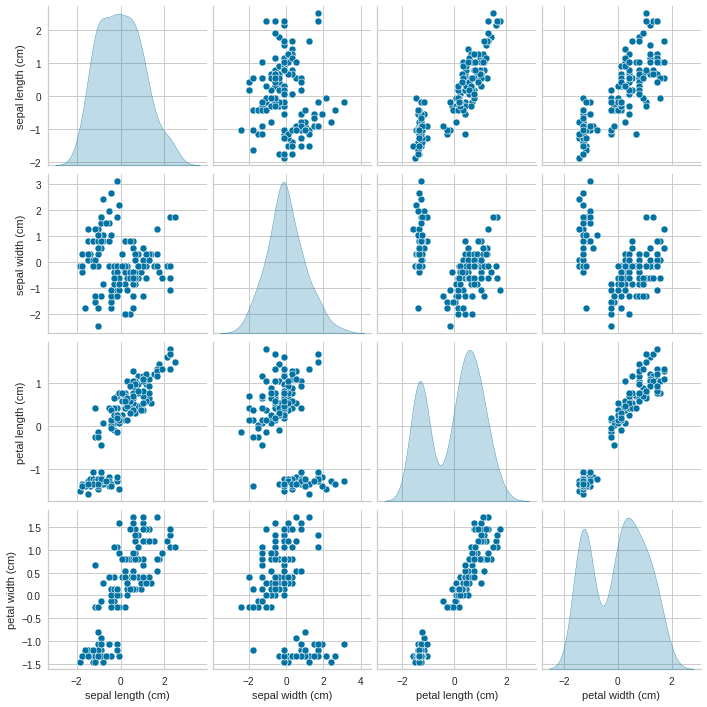

In [40]:
from sklearn.preprocessing import StandardScaler

df.iloc[:,:4] = StandardScaler().fit_transform(df.iloc[:,:4])
# Exploratory Data Analysis
sns.pairplot(df, diag_kind= 'kde')